Crime Data Analysis LAPD: Final Project

In [ ]:
#Loading neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

*Loading Dataset*

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("candacegostinski/crime-data-analysis")

print("Path to dataset files:", path)

100%|██████████| 47.5M/47.5M [00:02<00:00, 21.6MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/candacegostinski/crime-data-analysis/versions/1


*Data Understanding*

In [ ]:
df = pd.read_csv(f"{path}/Crime_Data_from_2020_to_Present.csv")
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


*Data Understanding and Data Cleaning*

In [ ]:
df.shape

(955339, 28)

In [ ]:
#Printing Number of instances and attributes
print(f'The dataset has {df.shape[0]} instances and {df.shape[1]} attributes')

The dataset has 955339 instances and 28 attributes


In [ ]:
#Verifying stats for datset
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.553390e+05,955339.000000,955339.000000,955339.000000,955339.000000,955339.000000,955339.000000,955327.000000,325019.000000,955328.000000,68466.000000,2294.000000,64.00000,955339.000000,955339.000000
mean,2.191355e+08,1338.453032,10.718033,1118.243545,1.407805,500.667710,29.383110,306.255200,363.741547,500.415756,958.107265,984.102005,991.21875,33.993372,-118.074280
std,1.261589e+07,652.186527,6.100431,610.098189,0.491427,206.867837,21.909695,217.844195,123.606085,206.661318,110.316767,51.662269,27.06985,1.660523,5.755746
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.105125e+08,900.000000,6.000000,621.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014500,-118.430700
50%,2.207106e+08,1420.000000,11.000000,1142.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.059000,-118.322500
75%,2.307171e+08,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.274000
max,2.499187e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [ ]:
#Viewing summary for our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955339 entries, 0 to 955338
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           955339 non-null  int64  
 1   Date Rptd       955339 non-null  object 
 2   DATE OCC        955339 non-null  object 
 3   TIME OCC        955339 non-null  int64  
 4   AREA            955339 non-null  int64  
 5   AREA NAME       955339 non-null  object 
 6   Rpt Dist No     955339 non-null  int64  
 7   Part 1-2        955339 non-null  int64  
 8   Crm Cd          955339 non-null  int64  
 9   Crm Cd Desc     955339 non-null  object 
 10  Mocodes         818664 non-null  object 
 11  Vict Age        955339 non-null  int64  
 12  Vict Sex        825294 non-null  object 
 13  Vict Descent    825284 non-null  object 
 14  Premis Cd       955327 non-null  float64
 15  Premis Desc     954770 non-null  object 
 16  Weapon Used Cd  325019 non-null  float64
 17  Weapon Des

In [ ]:
#Checking datatypes for our attributes
df.dtypes

,0
DR_NO,int64
Date Rptd,object
DATE OCC,object
TIME OCC,int64
AREA,int64
AREA NAME,object
Rpt Dist No,int64
Part 1-2,int64
Crm Cd,int64
Crm Cd Desc,object


*Handling Missing Values and Columns*

In [ ]:
df.isnull().sum()

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


In [ ]:
# Missingness table
miss = df.isna().sum().sort_values(ascending=False).to_frame("missing")
miss["missing_pct"] = (miss["missing"] / len(df)).round(3)
display(miss.head(20))

,missing,missing_pct
Crm Cd 4,955275,1.000
Crm Cd 3,953045,0.998
Crm Cd 2,886873,0.928
Cross Street,806439,0.844
Weapon Used Cd,630320,0.660
Weapon Desc,630320,0.660
Mocodes,136675,0.143
Vict Descent,130055,0.136
Vict Sex,130045,0.136
Premis Desc,569,0.001


In [ ]:
#Column Profiling to help understand each column: its data type, how many distinct values it has, and what fraction of data is missing

col_profile = pd.DataFrame({
    "dtype": df.dtypes,
    "nunique": df.nunique(dropna=True),
    "missing": df.isna().sum()})

col_profile["missing_pct"] = (col_profile["missing"] / len(df)).round(3)
col_profile.sort_values("missing_pct", ascending=False)


,dtype,nunique,missing,missing_pct
Crm Cd 4,float64,6,955275,1.000
Crm Cd 3,float64,37,953045,0.998
Crm Cd 2,float64,126,886873,0.928
Cross Street,object,10206,806439,0.844
Weapon Used Cd,float64,79,630320,0.660
Weapon Desc,object,79,630320,0.660
Mocodes,object,307531,136675,0.143
Vict Sex,object,5,130045,0.136
Vict Descent,object,20,130055,0.136
Premis Desc,object,306,569,0.001


In [ ]:
#Setting threshold as 50% to find the columns with more than 50% missing values of the whole data
Thereshold = 0.5
high_missing = col_profile[col_profile["missing_pct"] > Thereshold].index.tolist()
high_missing

['Weapon Used Cd',
 'Weapon Desc',
 'Crm Cd 2',
 'Crm Cd 3',
 'Crm Cd 4',
 'Cross Street']

In [ ]:
invalue_col = ['DR_NO', 'Crm Cd', 'Mocodes', 'Premis Cd',
               'LOCATION', 'Rpt Dist No', 'Crm Cd 1']


1. DR_NO: Unique incident number, every row has a different value.
No analytical meaning, no pattern value.

2. rm Cd / Crm Cd 1 / Crm Cd 2 / Crm Cd 3 / Crm Cd 4: Numeric LAPD crime codes, same information already exists in Crm Cd Desc.
Additional codes (2, 3, 4) are 90–100% missing.

3. Mocodes: Modus operandi codes. Extremely sparse & highly inconsistent

4. Premis Cd: Numeric version of Premis Desc.
Premis Desc is more interpretable.

5. LOCATION: Full street address, very high cardinality.

6. Cross Street: Cross street location, high missing and too detailed.

7. Weapon Desc: high missingness + inconsistent use

8. Weapon Used Cd: Numerical version of weapon, also 66% missing values.

9. Rpt Dist No: Internal LAPD reporting district, Extremely granular.

In [ ]:
drop_col = [x for x in set(high_missing + invalue_col) if x in df.columns]
print('Columns to be dropped:', drop_col)

Columns to be dropped: ['Premis Cd', 'Crm Cd 1', 'Crm Cd', 'LOCATION', 'DR_NO', 'Mocodes', 'Crm Cd 4', 'Rpt Dist No', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 3', 'Crm Cd 2', 'Cross Street']


In [ ]:
#Dropping columns we do not need and making a copy with cleaner dataset
df_new = df.drop(columns=drop_col).copy()
df_new.shape

(955339, 15)

*Date & Time cleaning & New time features*

In [ ]:
#Transforming date and time columns
date_col = "DATE OCC"
time_col = "TIME OCC"
date_reg = "Date Rptd"

if date_col in df_new.columns:
    df_new[date_col] = pd.to_datetime(df_new[date_col], errors="coerce")
else:
    raise ValueError(f"{date_col} not found in columns: {df_new.columns.tolist()}")

#Transforming TIME OCC column as it is an integer like 1230 for 12:30.
if time_col in df_new.columns:
    df_new[time_col] = df_new[time_col].astype(str).str.zfill(4)
    df_new["Hour"] = pd.to_numeric(df_new[time_col].str[:2], errors="coerce")
else:
    df_new["Hour"] = np.nan

if date_reg in df_new.columns:
    df_new[date_reg] = pd.to_datetime(df_new[date_reg], errors="coerce")
else:
    raise ValueError(f"{date_reg} not found in columns: {df_new.columns.tolist()}")

#Building time-based features
df_new["Year"] = df_new[date_col].dt.year
df_new["Month"] = df_new[date_col].dt.month
df_new["DayOfWeek"] = df_new[date_col].dt.day_name()

# Drop rows where DATE OCC is missing
df = df.dropna(subset=[date_col])

print("Shape after date cleaning:", df_new.shape)
df_new[[date_col, "Year", "Month", "DayOfWeek", "Hour"]].head()

Shape after date cleaning: (955339, 19)


,DATE OCC,Year,Month,DayOfWeek,Hour
0,2020-03-01,2020,3,Sunday,21
1,2020-02-08,2020,2,Saturday,18
2,2020-11-04,2020,11,Wednesday,17
3,2020-03-10,2020,3,Tuesday,20
4,2020-08-17,2020,8,Monday,12


In [ ]:
#Function to map hour of day into broad part-of-day
def part_of_day(h):
    if pd.isna(h):
        return "Unknown"
    h = int(h)
    if 5 <= h < 12:
        return "Morning"
    elif 12 <= h < 17:
        return "Afternoon"
    elif 17 <= h < 22:
        return "Evening"
    else:
        return "Night"

df_new["PartOfDay"] = df_new["Hour"].apply(part_of_day)
df_new["IsWeekend"] = df_new["DayOfWeek"].isin(["Saturday", "Sunday"]).astype(int)

df_new[["DATE OCC", "Hour", "PartOfDay", "DayOfWeek", "IsWeekend"]].head()


,DATE OCC,Hour,PartOfDay,DayOfWeek,IsWeekend
0,2020-03-01,21,Evening,Sunday,1
1,2020-02-08,18,Evening,Saturday,1
2,2020-11-04,17,Evening,Wednesday,0
3,2020-03-10,20,Evening,Tuesday,0
4,2020-08-17,12,Afternoon,Monday,0


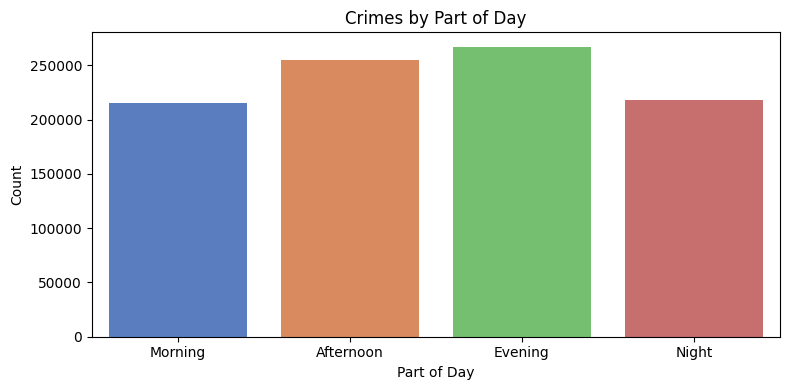

In [ ]:
#Visualizing crime frequency across different parts of the day
plt.figure(figsize=(8,4))
sns.countplot(x="PartOfDay", data=df_new, order=["Morning", "Afternoon", "Evening", "Night"], palette="muted")
plt.title("Crimes by Part of Day")
plt.xlabel("Part of Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


*Cleaning and Transforming 'Victim' Columns*

In [ ]:
df['Vict Age'].unique()

array([  0,  47,  19,  28,  41,  25,  27,  24,  26,   8,   7,  13,  56,
        22,  23,  31,  30,  57,  12,  46,  51,  37,  20,  29,  33,  34,
        15,  65,  59,   9,  35,  -2,  50,  64,  79,  40,  44,  32,  16,
        21,  42,   6,  72,  10,  60,  36,  18,  17,   5,  39,  62,  58,
        63,  45,  14,  71,  69,  49,  38,  61,  43,  78,  67,  53,  54,
        11,  48,  73,  52,  68,  81,  80,   3,  55,  89,  70,  77,  83,
        91,  82,  75,  76,  74,  -1,   2,  66,  84,  -3,   4,  87,  86,
        85,  90,  99,  96,  88,  92,  94,  93,  95,  97,  98, 120,  -4])

In [ ]:
#Removing impossible ages from our columns
if 'Vict Age' in df.columns:
    before = len(df_new)
    df_new = df_new[(df_new['Vict Age'].isna()) | ((df_new['Vict Age'] > 0) & (df_new['Vict Age'] < 121))]

    after = len(df_new)
    print(f"Rows for Vict Age: {after}")

Rows for Vict Age: 709608


In [ ]:
#Stripping extra spaces so coulmns are treated the same.
for col in ["Vict Sex", "Vict Descent", "AREA NAME", "Premis Desc", "Crm Cd Desc"]:
    if col in df_new.columns:
        df_new[col] = df_new[col].astype(str).str.strip()

In [ ]:
df_new['VictAge_Group'] = pd.cut(df_new['Vict Age'],
                                 bins=[0, 18, 30, 50, 70, 120],
                                 labels=['Child', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])

df_new.head()


,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Status Desc,LAT,LON,Hour,Year,Month,DayOfWeek,PartOfDay,IsWeekend,VictAge_Group
1,2020-02-09,2020-02-08,1800,1,Central,1,BURGLARY FROM VEHICLE,47,M,O,...,Invest Cont,34.0444,-118.2628,18,2020,2,Saturday,Evening,1,Adult
2,2020-11-11,2020-11-04,1700,3,Southwest,1,BIKE - STOLEN,19,X,X,...,Invest Cont,34.0210,-118.3002,17,2020,11,Wednesday,Evening,0,Young Adult
3,2023-05-10,2020-03-10,2037,9,Van Nuys,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,...,Invest Cont,34.1576,-118.4387,20,2020,3,Tuesday,Evening,0,Young Adult
4,2022-08-18,2020-08-17,1200,6,Hollywood,2,THEFT OF IDENTITY,28,M,H,...,Invest Cont,34.0944,-118.3277,12,2020,8,Monday,Afternoon,0,Young Adult
5,2023-04-04,2020-12-01,2300,18,Southeast,2,THEFT OF IDENTITY,41,M,H,...,Invest Cont,33.9467,-118.2463,23,2020,12,Tuesday,Night,0,Adult


In [ ]:
df_new['VictAge_Group'].value_counts()

,count
VictAge_Group,
Adult,303729
Young Adult,203222
Middle Aged,144202
Child,31138
Senior,27317


*Mapping Columns*

In [ ]:
df_new['Crm Cd Desc'].unique()

array(['BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'CHILD ANNOYING (17YRS & UNDER)', 'CONTEMPT OF COURT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT',
       'THEFT PLAIN - ATTEMPT', 'BURGLARY',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 'ROBBERY',
       'BUNCO, GRAND THEFT', 'BATTERY WITH SEXUAL CONTACT',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'ORAL COPULATION',
       'UN

In [ ]:
#Mapping detailed LAPD crime descriptions into broad categories.
def crime_category(desc):
    if pd.isna(desc):
        return "Other"

    d = str(desc).upper()

    #Violent Crime Category
    if any(word in d for word in [
        "ASSAULT","BATTERY","HOMICIDE","MURDER",
        "MANSLAUGHTER","KIDNAPPING","LYNCHING",
        "FALSE IMPRISONMENT","SHOTS FIRED","DISCHARGE FIREARMS",
        "BRANDISH WEAPON","CRIMINAL THREATS","HUMAN TRAFFICKING",
        "CHILD ABUSE", "CHILD STEALING","BATTERY POLICE", "ASSAULT WITH DEADLY WEAPON"]):
        return "Violent Crime"

    #Property / Theft (includes fraud, embezzlement, scams) Category
    if any(word in d for word in [
        "THEFT","BURGLARY","ROBBERY","STOLEN",
        "LARCENY","SHOPLIFT","PICKPOCKET","PURSE SNATCH",
        "BUNCO", "FRAUD","EMBEZZLEMENT","CREDIT CARD",
        "COUNTERFEIT","DOCUMENT WORTHLESS","INSURANCE FRAUD",
        "DRUNK ROLL","DEFRAUDING INNKEEPER","COIN MACHINE"]):
        return "Property / Theft"

    #Drug / Alcohol Category
    if any(word in d for word in [
        "DRUG","NARCOTIC","CONTROLLED SUBSTANCE",
        "ALCOHOL", "DUI"]):
        return "Drug / Alcohol"

    #Property Damage Category
    if any(word in d for word in [
        "VANDALISM","ARSON","GRAFFITI",
        "TRESPASS","ILLEGAL DUMPING",
        "TELEPHONE PROPERTY - DAMAGE"]):
        return "Property Damage"

    #Sex / Harassment / Exploitation Category
    if any(word in d for word in [
        "RAPE","SODOMY","SEX,UNLAWFUL",
        "SEXUAL","LEWD","INDECENT",
        "HARASS","STALK","PIMPING",
        "PANDERING","CHILD PORNOGRAPHY","INCEST",
        "BEASTIALITY"]):

        return "Sex / Harassment"

    #Vehicle / Traffic Category
    if any(word in d for word in [
        "VEHICLE - STOLEN", "VEHICLE, STOLEN",
        "VEHICLE - ATTEMPT STOLEN","VEHICLE, PASSENGER/TRUCK",
        "HIT AND RUN","RECKLESS DRIVING",
        "DRIVING WITHOUT OWNER CONSENT",
        "THROWING OBJECT AT MOVING VEHICLE", "TRAFFIC"]):
      return "Vehicle / Traffic"

    #Falling back to other if nothing matches
    return "Other"


In [ ]:
df_new["Crime_Category"] = df_new["Crm Cd Desc"].apply(crime_category)
df_new["Crime_Category"].value_counts()

,count
Crime_Category,
Property / Theft,346467
Violent Crime,235837
Property Damage,72844
Other,36016
Sex / Harassment,17618
Vehicle / Traffic,821
Drug / Alcohol,5


In [ ]:
#Checking unique values before we began mapping
df_new['Premis Desc'].unique()

array(['BUS STOP/LAYOVER (ALSO QUERY 124)',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'CLOTHING STORE',
       'SIDEWALK', 'SINGLE FAMILY DWELLING', 'CELL PHONE STORE',
       'CYBERSPACE', 'STREET', 'WEBSITE', 'PARKING LOT',
       'OTHER RESIDENCE', 'AUTOMATED TELLER MACHINE (ATM)',
       'OTHER BUSINESS', 'DEPARTMENT STORE', 'PUBLIC STORAGE',
       'GARAGE/CARPORT', 'EQUIPMENT RENTAL', 'OFFICE BUILDING/OFFICE',
       'MTA BUS', 'POLICE FACILITY', 'BANK',
       'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)',
       'SKATING RINK*', 'BUS STOP', 'JUNIOR HIGH SCHOOL', 'OTHER/OUTSIDE',
       'ALLEY', 'ABANDONED BUILDING ABANDONED HOUSE',
       'TRANSPORTATION FACILITY (AIRPORT)', 'VEHICLE, PASSENGER/TRUCK',
       'MOTEL', 'HOSPITAL', 'BUS, SCHOOL, CHURCH', 'OTHER PREMISE',
       'STORAGE SHED', 'OTHER STORE', 'MAIL BOX', 'HOTEL',
       'NIGHT CLUB (OPEN EVENINGS ONLY)', 'FINANCE COMPANY',
       'PARK/PLAYGROUND', 'COLISEUM', 'HEALTH SPA/GYM',
       'CHURCH/C

In [ ]:
def map_premis_group(desc):
    """
    Map detailed Premis Desc values into broader, human-readable location types.
    This helps us see patterns by 'type of place' instead of 200+ tiny categories.
    """
    if pd.isna(desc):
        return "Other"

    d = str(desc).upper()

    #Residential Category
    if any(x in d for x in [
        "SINGLE FAMILY DWELLING", "MULTI-UNIT DWELLING", "APARTMENT",
        "CONDOMINIUM", "TOWNHOUSE", "OTHER RESIDENCE", "GROUP HOME",
        "YARD", "PORCH", "GARAGE", "CARPORT", "BALCONY",
        "STORAGE SHED", "MOBILE HOME", "TRAILER", "RV"]):

        return "Residence"

    #Outdoor public space Category
    if any(x in d for x in [
        "STREET", "SIDEWALK", "ALLEY", "VACANT LOT", "PARK/PLAYGROUND",
        "PARK ", "PLAYGROUND", "BEACH", "YARD (RESIDENTIAL/BUSINESS)",
        "BASKETBALL COURTS", "RIVER BED", "DAM/RESERVOIR",
        "TRASH CAN", "TRASH DUMPSTER", "FREEWAY"]):

        return "Outdoor"

    #Business / Retail / Service Category
    if any(x in d for x in [
        "STORE", "SHOP", "MALL", "MARKET", "MINI-MART", "LIQUOR STORE",
        "DEPARTMENT STORE", "DISCOUNT STORE", "BEAUTY/BARBER",
        "NAIL SALON", "BEAUTY SUPPLY", "AUTO SALES LOT",
        "AUTO DEALERSHIP", "AUTO SUPPLY", "AUTO REPAIR",
        "PAWN SHOP", "JEWELRY STORE", "FURNITURE STORE",
        "TOBACCO SHOP", "CAR WASH", "HARDWARE", "GUN/SPORTING GOODS",
        "CLOTHING STORE", "TOOL SHED", "CLEANER", "LAUNDROMAT"]):

        return "Business / Retail"

    #Food / Hospitality / Nightlife Category
    if any(x in d for x in [
        "RESTAURANT", "FAST FOOD", "COFFEE SHOP",
        "BAR/", "NIGHT CLUB", "SPORTS BAR", "HOTEL", "MOTEL",
        "VALET"]):

        return "Food / Nightlife / Lodging"

    #Education Category
    if any(x in d for x in [
        "SCHOOL", "JUNIOR HIGH", "HIGH SCHOOL", "ELEMENTARY SCHOOL",
        "COLLEGE", "UNIVERSITY", "TRADE SCHOOL", "SPECIALTY SCHOOL",
        "DAY CARE", "PRESCHOOL", "FRAT HOUSE", "DORMITORY"]):

        return "Education"

    #Health Category
    if any(x in d for x in [
        "HOSPITAL", "MEDICAL", "DENTAL", "CLINIC", "METHADONE",
        "HOSPICE", "NURSING", "CONVALESCENT", "RETIREMENT HOME",
        "MEDICAL MARIJUANA", "VISION CARE"]):

        return "Health / Care"

    #Religeous Loc Category
    if any(x in d for x in [
        "CHURCH", "CHAPEL", "TEMPLE", "SYNAGOGUE", "MOSQUE",
        "PLACE OF WORSHIP"]):

        return "Religion"

    #Government / Public Service Category
    if any(x in d for x in [
        "POLICE FACILITY", "FIRE STATION", "POST OFFICE",
        "GOVERNMENT FACILITY", "COURT", "LIBRARY", "DETENTION/JAIL",
        "MUNICIPAL", "ABATEMENT LOCATION"]):

        return "Government / Public Service"

    #Transit / Transport Category
    if any(x in d for x in [
        "MTA", "BUS", "TRAIN", "STATION", "TERMINAL", "DEPOT",
        "UNION STATION", "METROLINK", "AMTRAK",
        "TRANSPORTATION FACILITY", "FREEWAY", "TAXI", "AIRCRAFT",
        "HARBOR FRWY", "SILVER LINE", "GOLD LINE", "BLUE LINE",
        "RED LINE", "PURPLE LINE", "GREEN LINE", "ORANGE LINE", "EXPO LINE"]):

        return "Transit / Transport"

    #Entertainment / Sports / Culture Category
    if any(x in d for x in [
        "STAPLES CENTER", "DODGER STADIUM", "COLISEUM", "SPORTS",
        "SKATING RINK", "SKATEBOARD", "BASKETBALL COURTS",
        "AMUSEMENT PARK", "THEATRE", "MOVIE", "ARENA",
        "MUSEUM", "MASS GATHERING", "CONVENTION CENTER",
        "COMEDY CLUB", "ENTERTAINMENT", "BOWLING ALLEY", "GOLF COURSE",
        "MUSCLE BEACH", "HORSE RACING"]):

        return "Entertainment / Sports"

    #Industrial / Infrastructure / Utilities Category
    if any(x in d for x in [
        "FACTORY", "WAREHOUSE", "ENERGY PLANT", "OIL REFINERY",
        "CHEMICAL", "SEWAGE", "WATER FACILITY", "GARMENT MANUFACTURER"]):

        return "Industrial / Infrastructure"

    #If nothing matched, falling back to Other
    return "Other"


In [ ]:
#Appling mapped columns to our dataframe
df_new["Premis_Group"] = df_new["Premis Desc"].apply(map_premis_group)
df_new["Premis_Group"].value_counts()

,count
Premis_Group,
Residence,302365
Outdoor,181205
Other,122545
Transit / Transport,40303
Business / Retail,28627
Food / Nightlife / Lodging,17558
Education,6723
Health / Care,3922
Government / Public Service,2420


*Exploratory Data Analysis (EDA)*

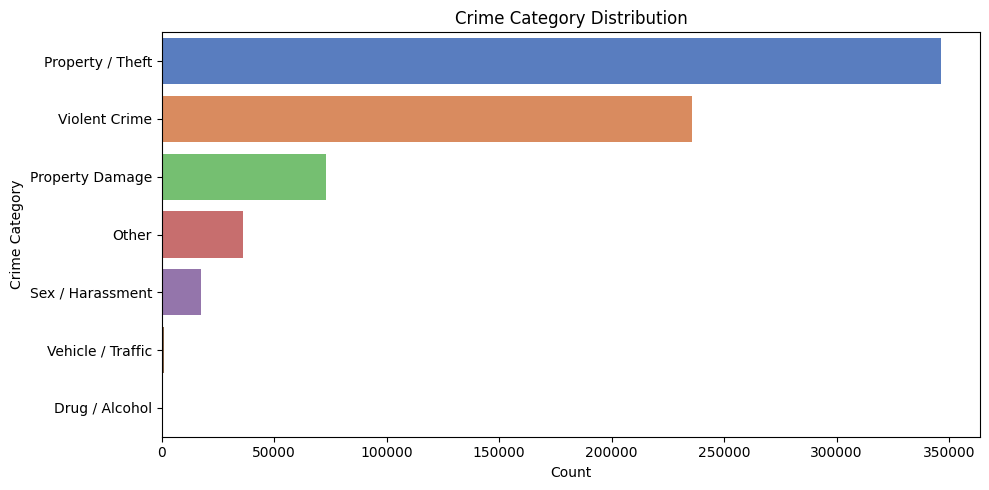

In [ ]:
#Plotting Crime Category distribution
plt.figure(figsize=(10,5))
sns.countplot(y="Crime_Category", data=df_new, order=df_new["Crime_Category"].value_counts().index, palette = 'muted')
plt.title("Crime Category Distribution")
plt.xlabel("Count")
plt.ylabel("Crime Category")
plt.tight_layout()
plt.show()

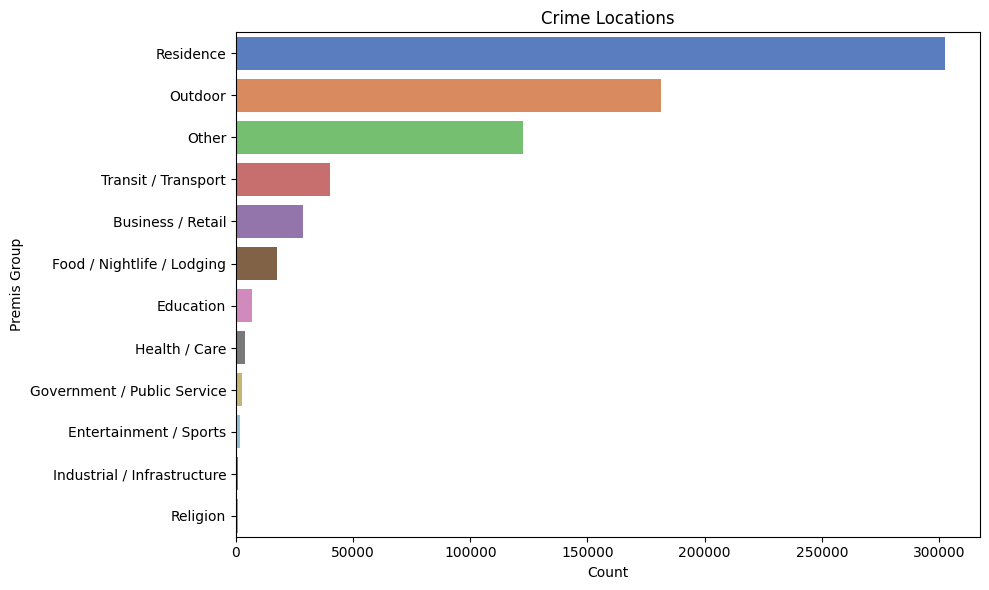

In [ ]:
#Plotting Premis Group distribution
plt.figure(figsize=(10,6))
sns.countplot(y="Premis_Group", data=df_new, order=df_new["Premis_Group"].value_counts().index, palette= 'muted')
plt.title("Crime Locations")
plt.xlabel("Count")
plt.ylabel("Premis Group")
plt.tight_layout()
plt.show()

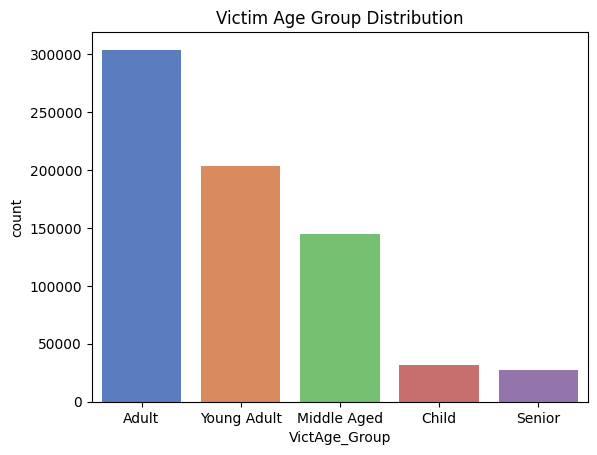

In [ ]:
#Plotting Victim Age distribution
sns.countplot(x="VictAge_Group", data=df_new, order=df_new["VictAge_Group"].value_counts().index, palette= 'muted')
plt.title("Victim Age Group Distribution")
plt.show()

*Time-Based Analysis*

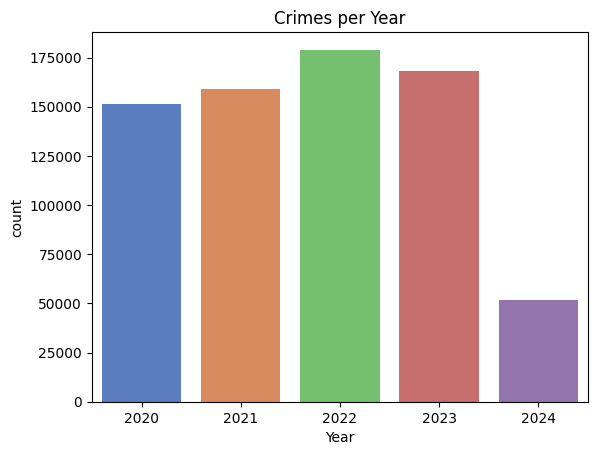

In [ ]:
#Plotting Crime per Year
sns.countplot(x="Year", data=df_new, palette= 'muted')
plt.title("Crimes per Year")
plt.show()

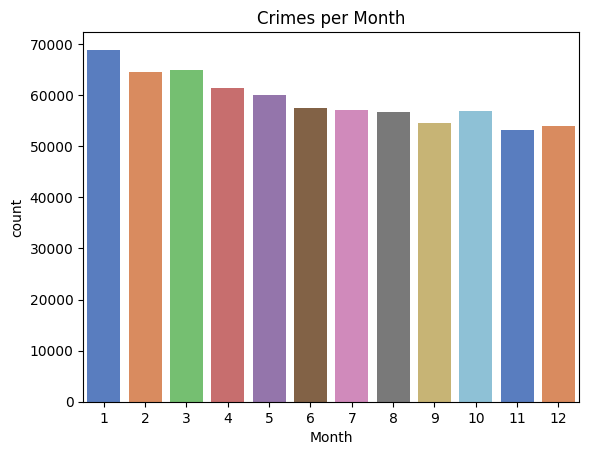

In [ ]:
#Plotting Crime per Month
sns.countplot(x="Month", data=df_new, palette= 'muted')
plt.title("Crimes per Month")
plt.show()

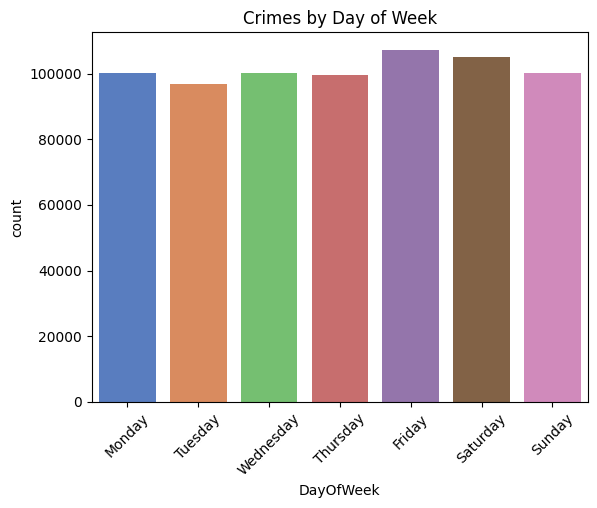

In [ ]:
#Plotting for Crime by Day of the Week
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(x="DayOfWeek", data=df_new, order=order, palette= 'muted')
plt.title("Crimes by Day of Week")
plt.xticks(rotation=45)
plt.show()


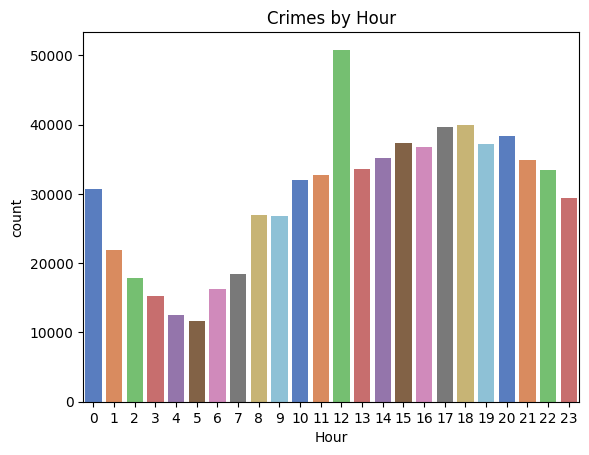

In [ ]:
#Plotting Crimes by Hours
sns.countplot(x="Hour", data=df_new, palette= 'muted')
plt.title("Crimes by Hour")
plt.show()


*Bivariate Analysis*

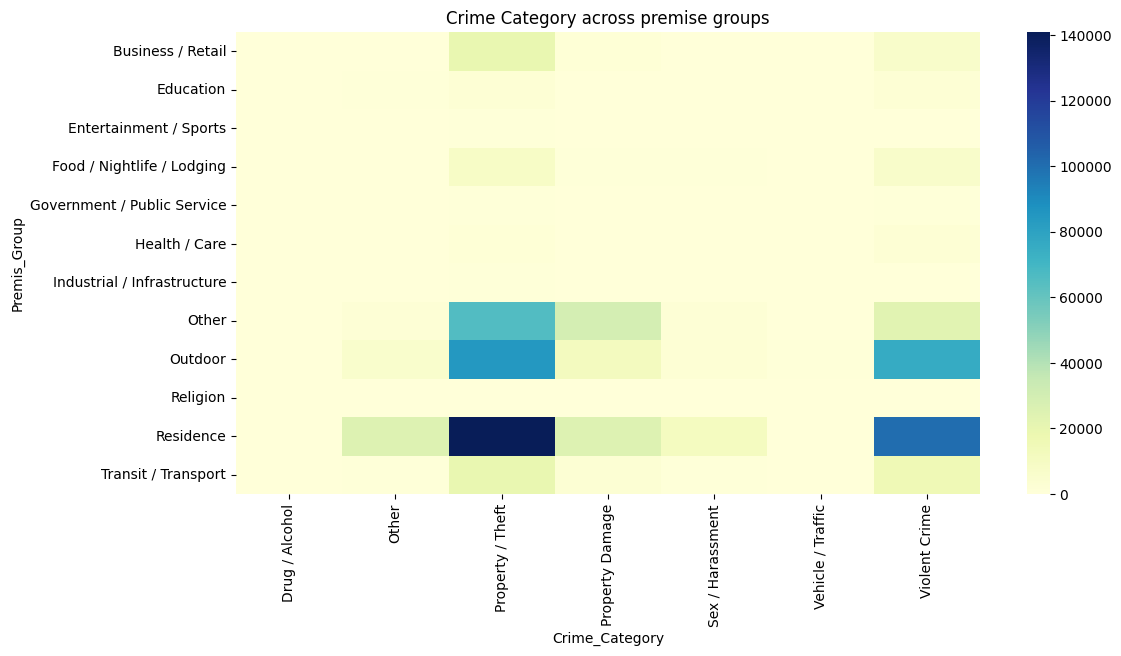

In [ ]:
#Plotting Heatmap of crime types across premise groups
ct = pd.crosstab(df_new["Premis_Group"], df_new["Crime_Category"])
plt.figure(figsize=(12,6))
sns.heatmap(ct, cmap="YlGnBu", annot=False)
plt.title("Crime Category across premise groups")
plt.show()

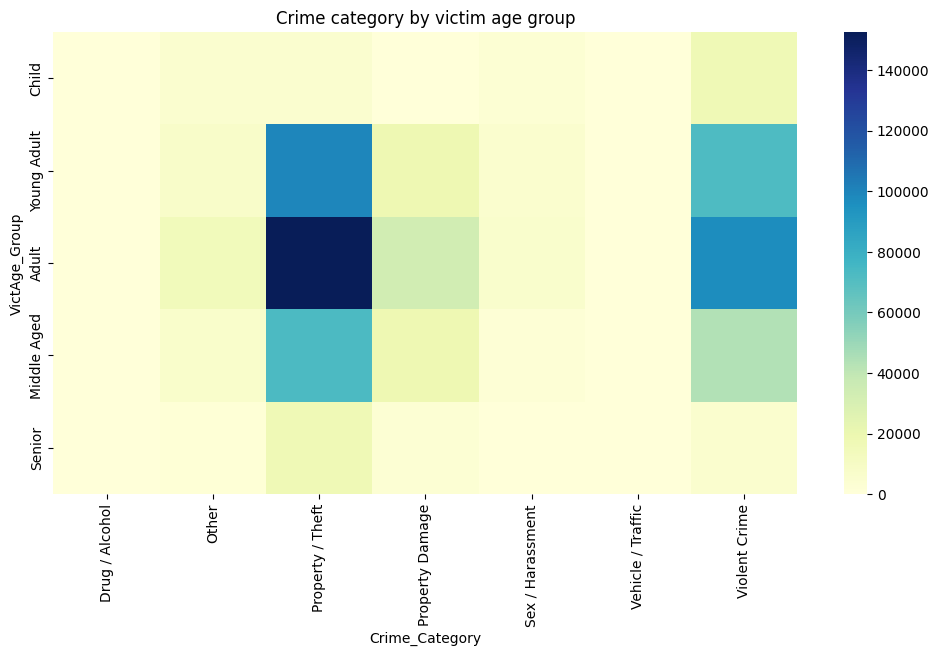

In [ ]:
#Plotting Heatmap of crime types by victim age group
ct_age = pd.crosstab(df_new["VictAge_Group"], df_new["Crime_Category"])
plt.figure(figsize=(12,6))
sns.heatmap(ct_age, cmap="YlGnBu")
plt.title("Crime category by victim age group")
plt.show()


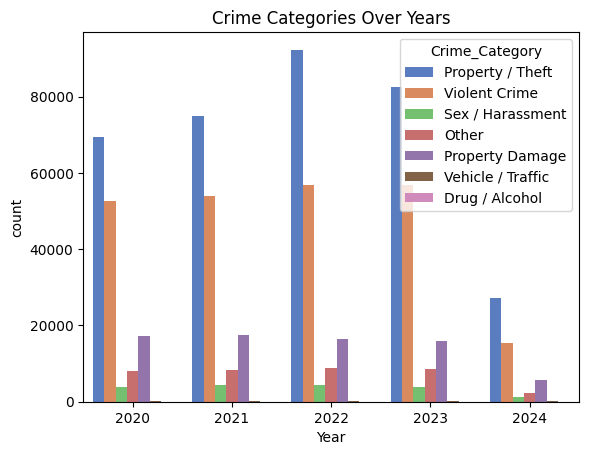

In [ ]:
#Plotting to Compare crime category trends across years
sns.countplot(x="Year", hue="Crime_Category", data=df_new, palette= 'muted')
plt.title("Crime Categories Over Years")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Heatmap of crime frequency by hour and weekday
pivot = df_new.pivot_table(index="Hour", columns="DayOfWeek",values="Crime_Category", aggfunc="count").fillna(0)
fig = px.imshow(pivot, labels=dict(x="Day of Week", y="Hour", color="Crime Count"),title="Crime Heatmap (Hour vs Day of Week)", color_continuous_scale="Viridis")
fig.show()

In [ ]:
df_new.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,LON,Hour,Year,Month,DayOfWeek,PartOfDay,IsWeekend,VictAge_Group,Crime_Category,Premis_Group
1,2020-02-09,2020-02-08,1800,1,Central,1,BURGLARY FROM VEHICLE,47,M,O,...,-118.2628,18,2020,2,Saturday,Evening,1,Adult,Property / Theft,Transit / Transport
2,2020-11-11,2020-11-04,1700,3,Southwest,1,BIKE - STOLEN,19,X,X,...,-118.3002,17,2020,11,Wednesday,Evening,0,Young Adult,Property / Theft,Residence
3,2023-05-10,2020-03-10,2037,9,Van Nuys,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,...,-118.4387,20,2020,3,Tuesday,Evening,0,Young Adult,Property / Theft,Business / Retail
4,2022-08-18,2020-08-17,1200,6,Hollywood,2,THEFT OF IDENTITY,28,M,H,...,-118.3277,12,2020,8,Monday,Afternoon,0,Young Adult,Property / Theft,Outdoor
5,2023-04-04,2020-12-01,2300,18,Southeast,2,THEFT OF IDENTITY,41,M,H,...,-118.2463,23,2020,12,Tuesday,Night,0,Adult,Property / Theft,Residence


*Phase 3 – Crime Forecasting*

In [ ]:
df_model = df_new.copy()


#Keeping only rows with a valid date
df_model = df_model.dropna(subset=["DATE OCC"])

#YearMonth period for aggregation
df_model["YearMonth"] = df_model["DATE OCC"].dt.to_period("M")

#Counting number of crimes per Year and Month
monthly_counts = (df_model.groupby("YearMonth").size().to_frame(name="crime_count"))

monthly_counts.head()

,crime_count
YearMonth,
2020-01,14746
2020-02,13696
2020-03,12384
2020-04,11672
2020-05,12649


*Harm-Weighted Crime Index (HCI) by Area & Premise*

In [ ]:
#Defining severity scores for each crime category
severity_map = {
    "Violent Crime": 5,
    "Sex / Harassment": 5,
    "Drug / Alcohol": 3,
    "Property / Theft": 2,
    "Property Damage": 2,
    "Vehicle / Traffic": 1,
    "Other": 1}

#Mapping each crime category to its severity score
df_new["Crime_Severity_Score"] = df_new["Crime_Category"].map(severity_map)


#Aggregating total incidents and total harm per area
area_hci = (df_new.groupby("AREA NAME").agg(total_incidents=("Crime_Category", "count"), total_harm=("Crime_Severity_Score", "sum")))

#Calculating average harm per incident
area_hci["avg_harm_per_incident"] = area_hci["total_harm"] / area_hci["total_incidents"]

#Ranking areas by total harm to identify high-impact zones
area_hci_sorted = area_hci.sort_values("total_harm", ascending=False)
area_hci_sorted.head(10)


,total_incidents,total_harm,avg_harm_per_incident
AREA NAME,,,
77th Street,45173,153051,3.388108
Central,49736,152911,3.074453
Southwest,45475,139010,3.056844
Southeast,35862,122781,3.423708
Hollywood,37749,114246,3.026464
Olympic,34952,108900,3.115702
Pacific,39974,108197,2.706684
Newton,32507,105305,3.239456
Rampart,31965,103219,3.229126


Analysis:

To go beyond simple incident counts, we created a Harm-Weighted Crime Index (HCI). Each Crime_Category was assigned a severity score and we summed these scores per AREA NAME.


- total_incidents: how busy an area is in terms of crime volume
- total_harm and avg_harm_per_incident: how severe those crimes are overall and on average


*My Understanding:*

Areas like Southwest, 77th Street, and Central sit at the top by total harm, meaning they don’t just have many crimes, the crimes they experience tend to be of high severity.

In [ ]:
#Grouping crimes by premise type
premise_hci = (df_new.groupby("Premis_Group").agg(total_incidents=("Crime_Category", "count"), total_harm=("Crime_Severity_Score", "sum")))

#Compute average harm per incident to capture intensity of crimes at each premise
premise_hci["avg_harm_per_incident"] = premise_hci["total_harm"] / premise_hci["total_incidents"]


premise_hci.sort_values("avg_harm_per_incident", ascending=False)


,total_incidents,total_harm,avg_harm_per_incident
Premis_Group,,,
Health / Care,3922,15179,3.870219
Food / Nightlife / Lodging,17558,57329,3.265121
Outdoor,181205,590274,3.257493
Education,6723,21672,3.223561
Transit / Transport,40303,128935,3.199142
Residence,302365,913751,3.022013
Entertainment / Sports,1763,5215,2.958026
Government / Public Service,2420,6748,2.788430
Religion,1082,3013,2.784658


*Analysis:*


Weighting crimes by severity shows that some premises have fewer incidents but higher average harm. Health/Care, Food/Nightlife, Outdoor, and Transit have the highest harm per incident (≈3.1–3.8), indicating more serious crimes occur there. Business/Retail and Industrial have lower harm scores, reflecting more frequent but less severe offenses like theft.



*Age vs Crime Category*

In [ ]:
#Counts of crime categories by victim age group
age_crime = pd.crosstab(df_new["VictAge_Group"], df_new["Crime_Category"])

#Convert counts to row-wise percentages (distribution of crime types within each age group)
age_cat_pct = age_crime.div(age_crime.sum(axis=1), axis=0) * 100
age_cat_pct.round(1)


Crime_Category,Drug / Alcohol,Other,Property / Theft,Property Damage,Sex / Harassment,Vehicle / Traffic,Violent Crime
VictAge_Group,,,,,,,
Child,0.0,16.8,16.8,1.4,10.8,0.1,54.2
Young Adult,0.0,3.9,48.7,9.0,2.7,0.1,35.6
Adult,0.0,4.7,50.2,10.8,2.1,0.1,32.0
Middle Aged,0.0,4.9,50.5,12.6,1.3,0.1,30.5
Senior,0.0,5.3,61.8,11.6,1.0,0.1,20.2


*Analysis:*


To understand who is exposed to which types of crime, we analysed the distribution of Crime_Category within each VictAge_Group.
Across all age groups, Property / Theft consistently accounts for the largest share of victimization, followed by Violent Crime, confirming that day-to-day risk.

*Interesting fact:*


- Sex / Harassment occupies a larger percentage share among Children and Young Adults than in older age groups, indicating that younger victims are disproportionately exposed to sexual and harassment-related offenses.

*Micro-Time Hot Windows*

In [ ]:
#Counting number of crimes by day of week and hour of day
slot_counts = (df_new.groupby(["DayOfWeek", "Hour"]).size().to_frame("count"))

#Sort slots by highest crime counts and select top 10 busiest time slots
top_slots = slot_counts.sort_values("count", ascending=False).head(10)
top_slots


count
DayOfWeek Hour       
Friday    12     7674
Wednesday 12     7624
Monday    12     7480
Tuesday   12     7339
Saturday  12     7080
Thursday  12     7067
Sunday    12     6558
Friday    17     6257
          18     6182
          15     6012

In [ ]:
#Calculating the percentage distribution of crimes across hours of the day
hour_counts = df_new["Hour"].value_counts(normalize=True) * 100
hour_counts.sort_index()


,proportion
Hour,
0,4.331969
1,3.083111
2,2.514487
3,2.147383
4,1.773937
5,1.639497
6,2.288728
7,2.601718
8,3.789275


In [ ]:
#Redid slot_counts excluding hour 12
slot_counts = (df_new[df_new["Hour"] != 12].groupby(["DayOfWeek", "Hour"]).size().to_frame("count").reset_index())

top_slots = slot_counts.sort_values("count", ascending=False).head(10)
top_slots


,DayOfWeek,Hour,count
16,Friday,17,6257
17,Friday,18,6182
14,Friday,15,6012
19,Friday,20,5905
155,Wednesday,18,5863
15,Friday,16,5846
18,Friday,19,5836
109,Thursday,18,5804
65,Saturday,20,5757
132,Tuesday,18,5732


*Analysis:*

When I initially analysed crimes by hour and day of week, the 12:00 time slot appeared as the busiest hour every day.A follow-up check showed that a very large share of incidents were recorded exactly at 12:00, which is likely used as a default or approximate time when the precise hour is unknown.

To avoid misleading conclusions, we excluded records with Hour = 12 from the micro-time analysis and recomputed the top DayOfWeek × Hour combinations.


*My Understanding:*

Afternoon and evening periods are on high-activity days.

*Crime-type by premise group*

In [ ]:
#Counting crime categories by premise type
premise_crime = pd.crosstab(df_new["Premis_Group"], df_new["Crime_Category"])

#showing the distribution of crime types as percentages
premise_crime_pct = premise_crime.div(premise_crime.sum(axis=1), axis=0) * 100
premise_crime_pct.round(1)


Crime_Category,Drug / Alcohol,Other,Property / Theft,Property Damage,Sex / Harassment,Vehicle / Traffic,Violent Crime
Premis_Group,,,,,,,
Business / Retail,0.0,1.3,68.2,4.8,0.8,0.0,24.9
Education,0.0,9.9,39.1,6.9,5.7,0.0,38.4
Entertainment / Sports,0.0,1.5,62.3,3.7,1.4,0.0,31.1
Food / Nightlife / Lodging,0.0,2.1,50.0,5.0,3.5,0.0,39.4
Government / Public Service,0.0,16.8,39.8,11.4,2.7,0.0,29.2
Health / Care,0.0,3.1,28.2,5.4,3.7,0.0,59.6
Industrial / Infrastructure,0.0,1.8,70.9,12.4,1.3,0.0,13.6
Other,0.0,1.7,53.7,23.8,1.6,0.0,19.1
Outdoor,0.0,3.1,46.7,6.7,1.3,0.4,41.8


*Analysis:*

- Property/Theft dominates most premises, especially Business/Retail (68%) and Entertainment/Sports (62%).
- Violent Crime is highest in Outdoor (41.8%), Transit/Transport (39.1%), and Food/Nightlife/Lodging (39.4%), showing that open and nightlife environments carry more interpersonal risk.
- Sex/Harassment is elevated in Education (5.7%) suggesting vulnerability in institutional settings.

*Victim Time-of-Day Patterns by Age*

In [ ]:
#Counting incidents by age group across each hour of the day
age_time = df_new.groupby(["VictAge_Group", "Hour"]).size().unstack(fill_value=0)
age_time


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
VictAge_Group,,,,,,,,,,,,,,,,,,,,,
Child,1698,632,477,365,232,184,394,701,1266,827,...,1692,2733,2221,1874,1774,1620,1713,1499,1300,1096
Young Adult,9767,8009,6236,4842,3755,3236,4239,4568,6459,6754,...,9359,9927,9837,10823,11423,10977,11780,10954,11149,10319
Adult,12949,9498,7836,6795,5754,5337,7717,8404,11657,11557,...,14714,14985,15303,16796,17192,16169,16664,15204,14624,12628
Middle Aged,5264,3291,2958,2871,2505,2561,3377,4160,6168,6306,...,7675,7947,7873,8555,8169,7271,7103,6255,5630,4791
Senior,1062,448,336,365,342,316,514,629,1339,1318,...,1776,1697,1601,1555,1382,1180,1087,951,785,602


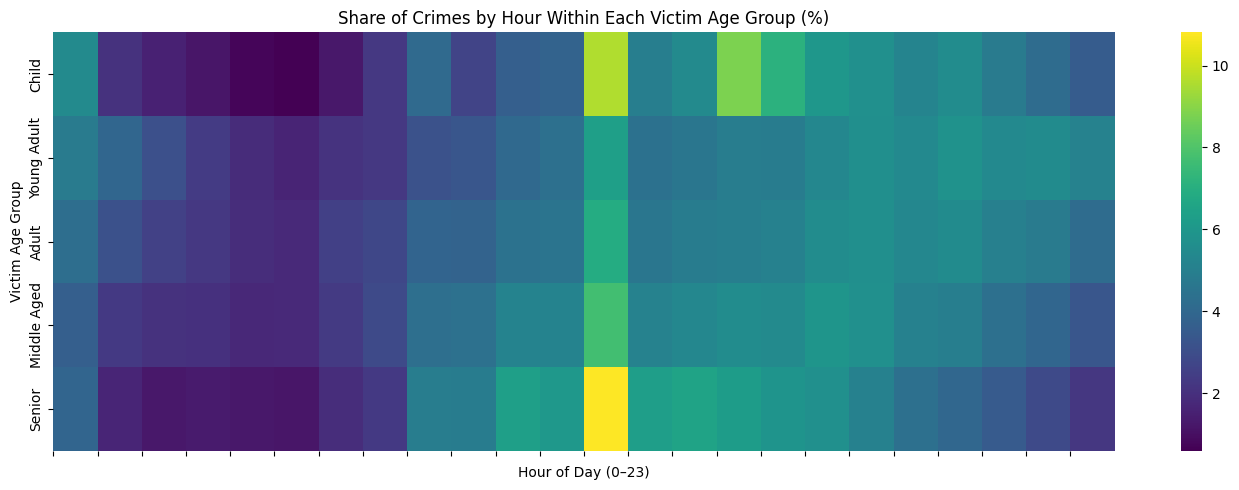

In [ ]:
age_time_pct = age_time.div(age_time.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 5))
sns.heatmap(age_time_pct,annot=False,cmap="viridis")
plt.title("Share of Crimes by Hour Within Each Victim Age Group (%)")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Victim Age Group")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

*Analysis:*

Analysing crime incidents by VictAge_Group and Hour to reveal strong age-specific  patterns that help explain victim vulnerability across the day.

Children face most incidents during school/daytime hours, while Young Adults show high exposure in the evening and night hours, matching nightlife activity. Adults have high volume throughout the day, with peaks around commuting hours. Middle-Aged and Seniors show mainly daytime risk.

Overall, victimization risk changes significantly across the day depending on age group.

*Building monthly feature table for forecasting*

In [ ]:
monthly_features = monthly_counts.copy()

#Adding Year and Month from the YearMonth index
monthly_features["Year"] = monthly_features.index.year
monthly_features["Month"] = monthly_features.index.month

In [ ]:
#Mapping months into seasons
def month_to_season(m):
    if m in [11, 12, 1, 2]:
        return "Winter"
    elif m in [3, 4, 5]:
        return "Spring"
    elif m in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

monthly_features["Season"] = monthly_features["Month"].apply(month_to_season)

In [ ]:
#Weekend ratio per month
df_model["is_weekend"] = df_model["DayOfWeek"].isin(["Saturday", "Sunday"]).astype(int)

weekend_ratio = (df_model.groupby("YearMonth")["is_weekend"].mean().to_frame("weekend_ratio"))
monthly_features = monthly_features.join(weekend_ratio, how="left")

In [ ]:
#Add lag-based features
monthly_features["prev_month_crime"] = monthly_features["crime_count"].shift(1)
monthly_features["prev2_month_crime"] = monthly_features["crime_count"].shift(2)

#Average the last 3 months of crime counts
monthly_features["rolling_mean_3"] = (monthly_features["crime_count"].rolling(window=3, min_periods=1).mean())

#Final dataset for modelling – drop rows missing lag values
monthly_model = monthly_features.dropna().copy()

monthly_model.head()

,crime_count,Year,Month,Season,weekend_ratio,prev_month_crime,prev2_month_crime,rolling_mean_3
YearMonth,,,,,,,,
2020-03,12384,2020,3,Spring,0.293282,13696.0,14746.0,13608.666667
2020-04,11672,2020,4,Spring,0.263194,12384.0,13696.0,12584.000000
2020-05,12649,2020,5,Spring,0.325085,11672.0,12384.0,12235.000000
2020-06,12569,2020,6,Summer,0.258254,12649.0,11672.0,12296.666667
2020-07,12864,2020,7,Summer,0.260261,12569.0,12649.0,12694.000000


In [ ]:
#Selecting features for forecasting
forecast_features = ["Year", "Month", "weekend_ratio", "prev_month_crime",  "prev2_month_crime", "rolling_mean_3"]

monthly_model_clean = monthly_model.dropna(subset=forecast_features + ["crime_count"]).copy()

X = monthly_model_clean[forecast_features]
y = monthly_model_clean["crime_count"]

#Splitting into train-test spli
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Modelling Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = lin_reg.score(X_test, y_test)

print("Monthly Crime Forecast – Linear Regression")
print("MAE :", round(mae, 1))
print("RMSE:", round(rmse, 1))
print("R²  :", round(r2, 3))


Monthly Crime Forecast – Linear Regression
MAE : 0.0
RMSE: 0.0
R²  : 1.0


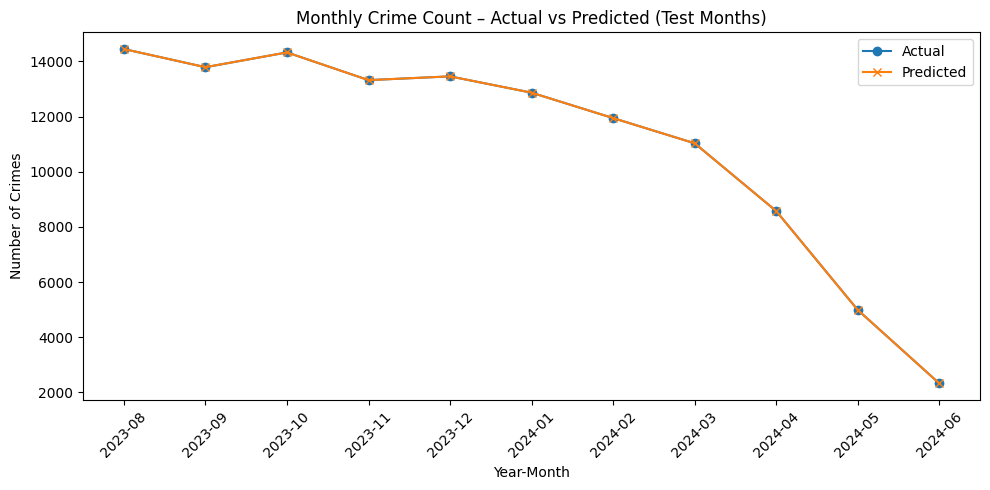

In [ ]:
#Plotting Actual vs Predicted
test_index = monthly_model_clean.index[-len(y_test):]
x_labels = monthly_model_clean.loc[test_index].index.astype(str)

plt.figure(figsize=(10,5))
plt.plot(x_labels, y_test.values, label="Actual", marker="o")
plt.plot(x_labels, y_pred, label="Predicted", marker="x")
plt.xticks(rotation=45)
plt.title("Monthly Crime Count – Actual vs Predicted (Test Months)")
plt.xlabel("Year-Month")
plt.ylabel("Number of Crimes")
plt.legend()
plt.tight_layout()
plt.show()

*Analysis:*

Analysing monthly crime counts with added time-based features (Year, Month, Season, Weekend Ratio) and lag features (crime from the previous 1–2 months and the rolling 3-month average) helped reveal the underlying structure of crime trends in Los Angeles.

By engineering lag variables, we captured how crime today is influenced by crime in recent month. We trained model to learn month-to-month continuity and seasonal movement.

The decline seen in the final months is consistently captured by both the true and forecasted values, showing that the lag-based design effectively modeled the downward trajectory.

Overall, the crime forecasting pipeline showed that crime trends follow seasonal patterns, weekend activity shifts, etc.

*Modelling with Decision Tree and Clustering*

In [ ]:
#Keeping only rows with complete values in key crime-related columns
required_cols = [
    "Crime_Category",
    "Premis_Group",
    "VictAge_Group",
    "DayOfWeek",
    "Hour",
    "LAT",
    "LON",
    "Year",
    "Month",
    "AREA NAME",
    "Vict Sex",
    "Vict Descent",]


crime_df = df_new.dropna(subset=required_cols).copy()
print("Shape after dropping missing rows:", crime_df.shape)

Shape after dropping missing rows: (709608, 25)


In [ ]:
#Creating 'Hour_squared' which helps capture nonlinear time patterns in crime data
crime_df["Hour_squared"] = crime_df["Hour"] ** 2

In [ ]:
#Feature matrix X and target y
X = crime_df[[
    "Year",
    "Month",
    "Hour",
    "LAT",
    "LON",
    "Hour_squared",
    "IsWeekend",
    "DayOfWeek",
    "Premis_Group",
    "VictAge_Group",
    "AREA NAME",
    "Vict Sex",
    "Vict Descent"]]

y = crime_df["Crime_Category"]

In [ ]:
#Encoding
xencoded = pd.get_dummies(X, drop_first=True)
print("Encoded feature shape:", xencoded.shape)

Encoded feature shape: (709608, 72)


In [ ]:
#Splitting our dataset into train and test
xtrain, xtest, ytrain, ytest = train_test_split(xencoded, y, test_size=0.2, random_state=42)

print("Train shape:", xtrain.shape)
print("Test shape:", xtest.shape)

Train shape: (567686, 72)
Test shape: (141922, 72)


In [ ]:
#Training Decision Tree Model
dt_df = DecisionTreeClassifier(random_state=42, min_samples_leaf=50, max_depth=20)
dt_df.fit(xtrain, ytrain)

ypred = dt_df.predict(xtest)

In [ ]:
#Decision Tree Evaluation
print(classification_report(ytest, ypred))
print('ACCURACY', accuracy_score(ytest, ypred))

                   precision    recall  f1-score   support

            Other       0.33      0.04      0.06      7181
 Property / Theft       0.59      0.76      0.66     69113
  Property Damage       0.41      0.12      0.18     14589
 Sex / Harassment       0.32      0.01      0.02      3551
Vehicle / Traffic       0.00      0.00      0.00       169
    Violent Crime       0.51      0.51      0.51     47319

         accuracy                           0.55    141922
        macro avg       0.36      0.24      0.24    141922
     weighted avg       0.52      0.55      0.51    141922

ACCURACY 0.554170600752526


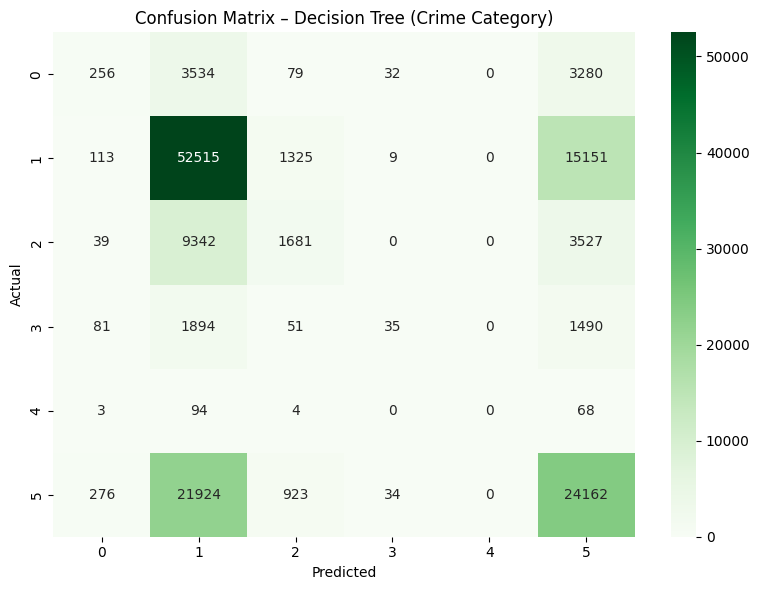

In [ ]:
#Confusion Matrix for DT
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix – Decision Tree (Crime Category)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

The Decision Tree model shows moderate overall accuracy (55.4%), largely by "Property / Theft" class. However, it struggles significantly with minority categories like "Sex / Harassment" and "Vehicle / Traffic," which are ignored.

In [ ]:
# Get feature importances
importances = pd.DataFrame({
    "Feature": xencoded.columns,
    "Importance": dt_df.feature_importances_})

#Filter to non-zero importance
importances = importances[importances["Importance"] > 0]
top10 = importances.sort_values("Importance", ascending=False).head(10)

print("Top 10 Most Influential Features for Predicting Crime Category:")
display(top10)

Top 10 Most Influential Features for Predicting Crime Category:


,Feature,Importance
53,Vict Descent_B,0.133253
3,LAT,0.132023
4,LON,0.117535
58,Vict Descent_H,0.115899
19,Premis_Group_Other,0.092528
2,Hour,0.060466
5,Hour_squared,0.039137
0,Year,0.033722
22,Premis_Group_Residence,0.031716
1,Month,0.030570


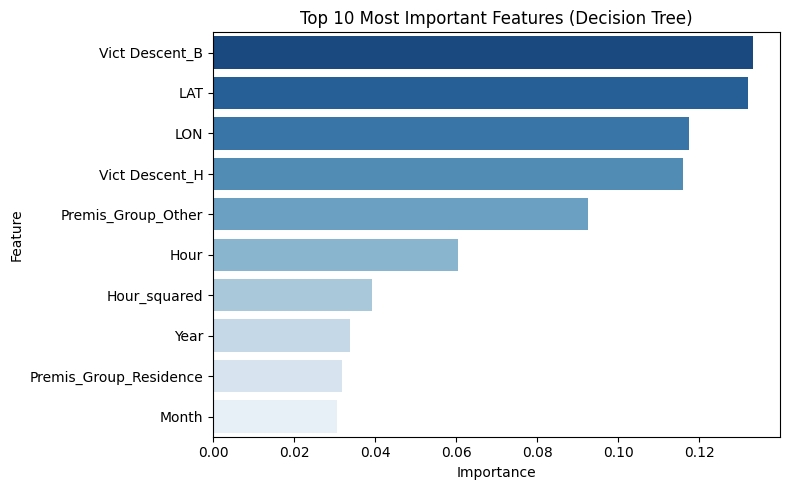

In [ ]:
#Bar plot for important features
plt.figure(figsize=(8, 5))
sns.barplot(data=top10, x="Importance", y="Feature", palette="Blues_r")
plt.title("Top 10 Most Important Features (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

*Analysis:*

Decision tree model helps us understand features that drives its decisions. Fou our model top features that strongly influenced crime classification were a mix of location, time, and victim characteristics; Confirming that crime behaviour in Los Angeles is far more vast and highly imprinted through geography, demographics, and trends.

*K-Means clustering: Premis_group × Crime_category*

In [ ]:
#Computing the cross-tab: Premise Group × Crime Category
premise_crime_counts = pd.crosstab(df_new["Premis_Group"], df_new["Crime_Category"])

#Converting counts to row-wise percentages (distribution)
premise_crime_pct = premise_crime_counts.div(premise_crime_counts.sum(axis=1), axis=0)

#Computing harm score: avg severity score per premise group
premise_harm = (df_new.groupby("Premis_Group")["Crime_Severity_Score"].mean().to_frame("avg_harm_score"))

#Computing total incidents per premise group
premise_volume = (df_new.groupby("Premis_Group")["Crime_Category"].count().to_frame("total_incidents"))

In [ ]:
#Combining crime percentage, harm, and volume data into one DataFrame
cluster_df = premise_crime_pct.join(premise_harm).join(premise_volume)
cluster_df.head()

,Drug / Alcohol,Other,Property / Theft,Property Damage,Sex / Harassment,Vehicle / Traffic,Violent Crime,avg_harm_score,total_incidents
Premis_Group,,,,,,,,,
Business / Retail,0.000000,0.012995,0.682223,0.047612,0.008139,0.000035,0.248996,2.758375,28627
Education,0.000149,0.098765,0.391492,0.068868,0.056522,0.000000,0.384203,3.223561,6723
Entertainment / Sports,0.000000,0.015315,0.623369,0.036869,0.013613,0.000000,0.310834,2.958026,1763
Food / Nightlife / Lodging,0.000000,0.020731,0.500285,0.050290,0.034685,0.000057,0.393951,3.265121,17558
Government / Public Service,0.000000,0.168182,0.397934,0.114463,0.026860,0.000413,0.292149,2.788430,2420


In [ ]:
#Scaling features and fitting k-means cluster
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)

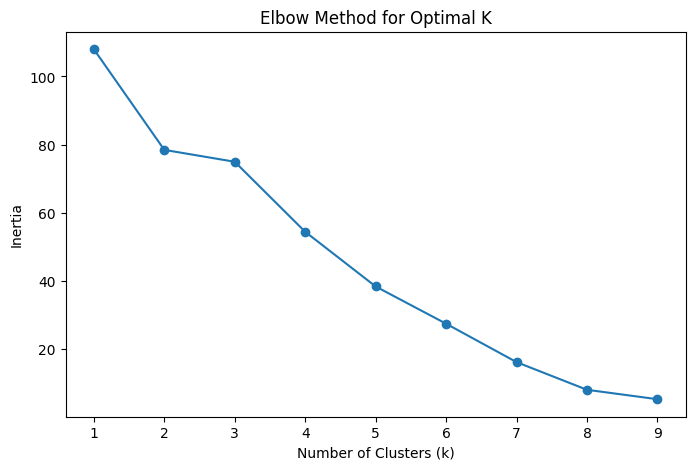

In [ ]:
inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertias, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [ ]:
#Applying KMeans clustering (k=3) on scaled data, assign cluster labels to DataFrame
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_scaled)

cluster_df["Cluster"] = cluster_labels
print("\nAssigned Clusters:")
display(cluster_df)


Assigned Clusters:


,Drug / Alcohol,Other,Property / Theft,Property Damage,Sex / Harassment,Vehicle / Traffic,Violent Crime,avg_harm_score,total_incidents,Cluster
Premis_Group,,,,,,,,,,
Business / Retail,0.000000,0.012995,0.682223,0.047612,0.008139,0.000035,0.248996,2.758375,28627,1
Education,0.000149,0.098765,0.391492,0.068868,0.056522,0.000000,0.384203,3.223561,6723,2
Entertainment / Sports,0.000000,0.015315,0.623369,0.036869,0.013613,0.000000,0.310834,2.958026,1763,1
Food / Nightlife / Lodging,0.000000,0.020731,0.500285,0.050290,0.034685,0.000057,0.393951,3.265121,17558,1
Government / Public Service,0.000000,0.168182,0.397934,0.114463,0.026860,0.000413,0.292149,2.788430,2420,0
Health / Care,0.000000,0.030597,0.282254,0.053544,0.037481,0.000000,0.596124,3.870219,3922,1
Industrial / Infrastructure,0.000000,0.018265,0.708676,0.124201,0.012785,0.000000,0.136073,2.428311,1095,1
Other,0.000000,0.017251,0.537150,0.238117,0.015570,0.000498,0.191415,2.603207,122545,1
Outdoor,0.000006,0.031329,0.466985,0.066615,0.013294,0.004095,0.417676,3.257493,181205,1


This immediately tells you:

- Cluster 0: Government + Religion
- Cluster 1: Business / Retail, Entertainment / Sports, Food / Nightlife / Lodging, Health / Care, Industrial / Infrastructure, Other, Outdoor, Residence, Transit / Transport
- Cluster 2: Education

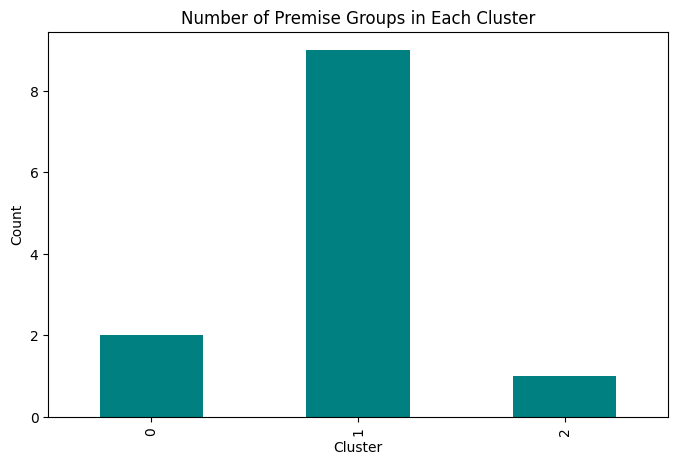

In [ ]:
#Plotting bar chart showing how many premise groups fall into each cluster
plt.figure(figsize=(8,5))
cluster_df["Cluster"].value_counts().sort_index().plot(kind="bar", color="teal")
plt.title("Number of Premise Groups in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

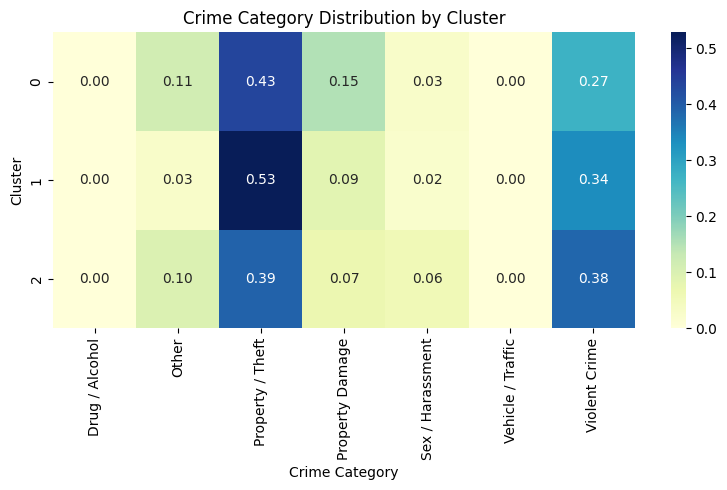

In [ ]:
#Plotting heatmap of average crime category values per cluster for distribution
plt.figure(figsize=(8,5))
sns.heatmap(cluster_df.drop(columns=["avg_harm_score", "total_incidents", "Cluster"]).groupby(cluster_df["Cluster"]).mean(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Crime Category Distribution by Cluster")
plt.ylabel("Cluster")
plt.xlabel("Crime Category")
plt.tight_layout()
plt.show()

In [ ]:
cluster_summary = cluster_df.groupby("Cluster").mean()

print("\n Cluster Profiles (avg features):")
cluster_summary


 Cluster Profiles (avg features):


,Drug / Alcohol,Other,Property / Theft,Property Damage,Sex / Harassment,Vehicle / Traffic,Violent Crime,avg_harm_score,total_incidents
Cluster,,,,,,,,,
0,0.000000,0.114590,0.433717,0.151039,0.028217,0.000207,0.272230,2.786544,1751.000000
1,0.000004,0.028311,0.528528,0.086253,0.021028,0.000548,0.335328,3.040212,77709.222222
2,0.000149,0.098765,0.391492,0.068868,0.056522,0.000000,0.384203,3.223561,6723.000000


Risk Assessment

In [ ]:
area_risk = area_hci.copy()

#Scaling our features
scaler_area = MinMaxScaler()
area_risk[["norm_incidents", "norm_total_harm", "norm_avg_harm"]] = scaler_area.fit_transform(area_risk[["total_incidents", "total_harm", "avg_harm_per_incident"]])


area_risk["risk_score"] = (0.5 * area_risk["norm_total_harm"] + 0.3 * area_risk["norm_incidents"] +  0.2 * area_risk["norm_avg_harm"])

Top 10 High-Risk Areas (Combined Score):


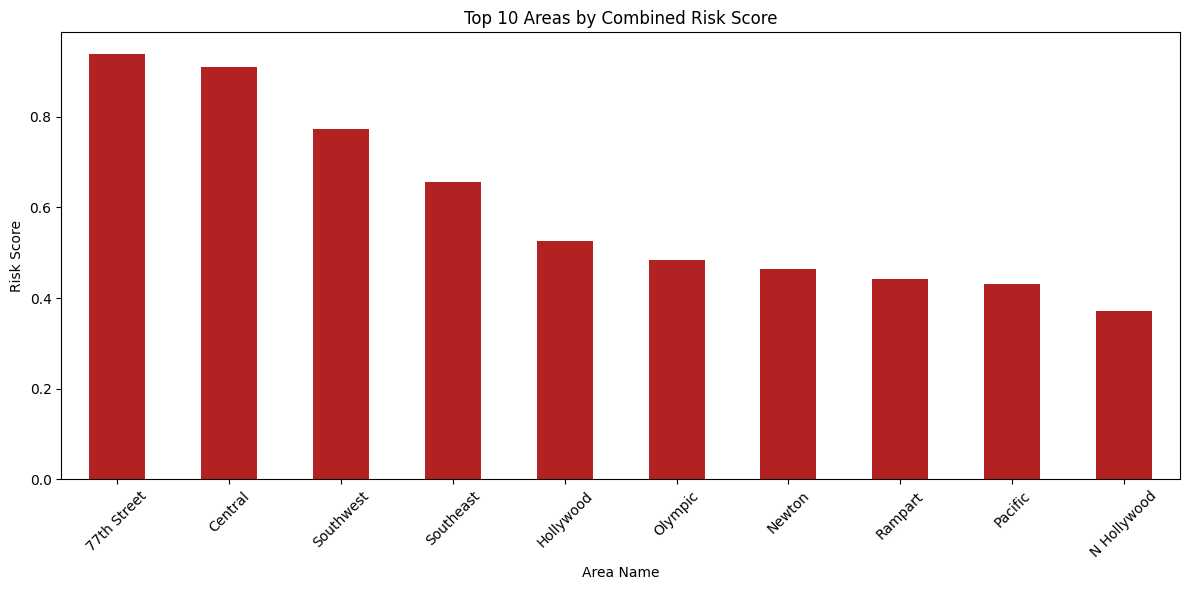

In [ ]:
area_risk_sorted = area_risk.sort_values("risk_score", ascending=False)

print("Top 10 High-Risk Areas (Combined Score):")
area_risk_sorted.head(10)

#Plotting Bar chart for top 10 areas by risk score
plt.figure(figsize=(12,6))
area_risk_sorted["risk_score"].head(10).plot(kind="bar", color="firebrick")
plt.title("Top 10 Areas by Combined Risk Score")
plt.ylabel("Risk Score")
plt.xlabel("Area Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Premise Groups Ranked by Combined Risk:


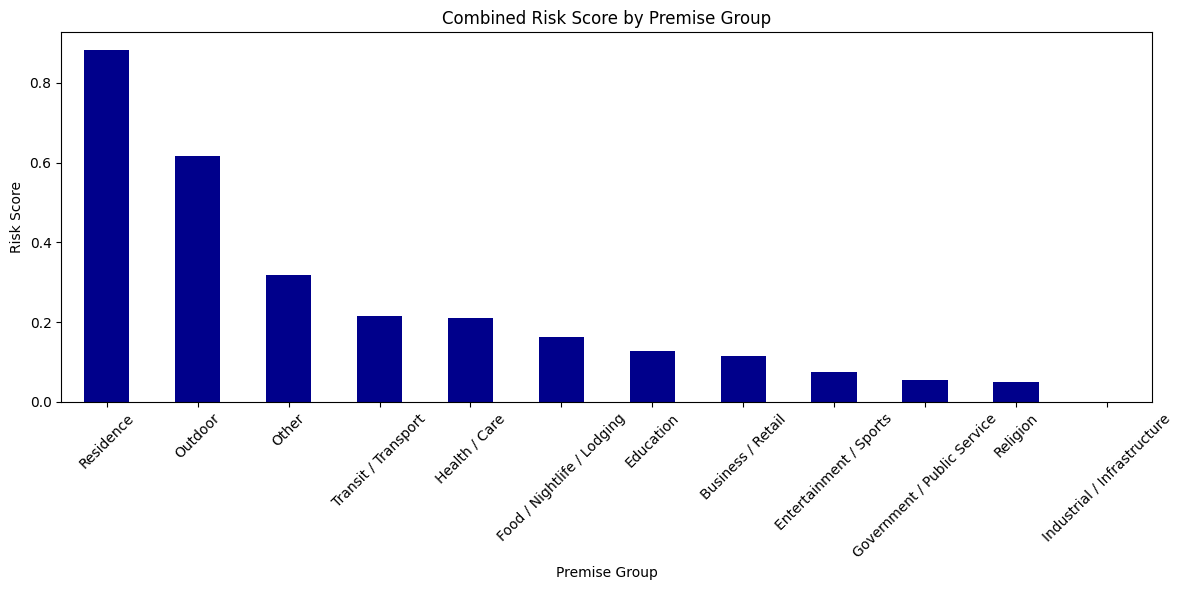

In [ ]:
premise_risk = premise_hci.copy()

scaler_prem = MinMaxScaler()
premise_risk[["norm_incidents", "norm_total_harm", "norm_avg_harm"]] = scaler_prem.fit_transform(
    premise_risk[["total_incidents", "total_harm", "avg_harm_per_incident"]])

premise_risk["risk_score"] = (0.5 * premise_risk["norm_total_harm"] + 0.3 * premise_risk["norm_incidents"] + 0.2 * premise_risk["norm_avg_harm"])

premise_risk_sorted = premise_risk.sort_values("risk_score", ascending=False)

print("Premise Groups Ranked by Combined Risk:")
premise_risk_sorted

#Plotting Bar Graph for combined risk score by Premise Group
plt.figure(figsize=(12,6))
premise_risk_sorted["risk_score"].plot(kind="bar", color="darkblue")
plt.title("Combined Risk Score by Premise Group")
plt.ylabel("Risk Score")
plt.xlabel("Premise Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

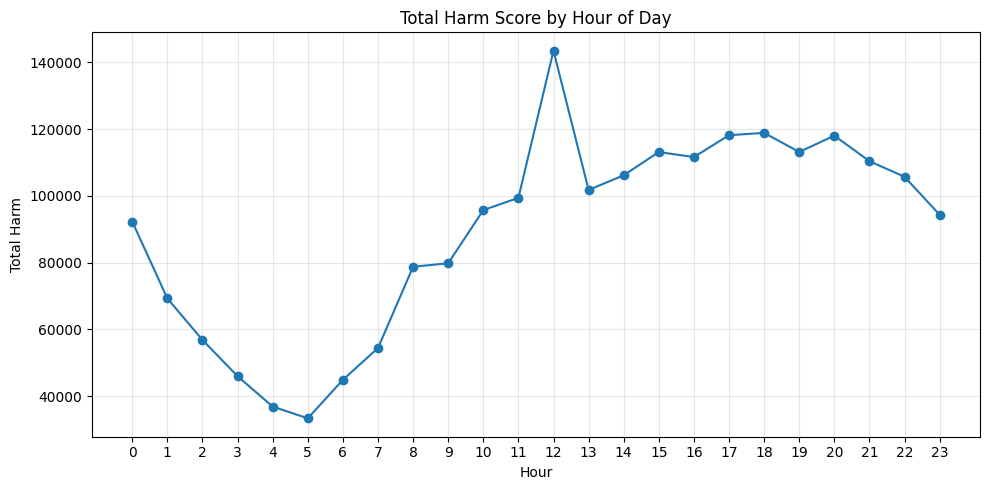

In [ ]:
#Grouping crimes by hour, and calculating harm metrics
hour_harm = (df_new.groupby("Hour")["Crime_Severity_Score"].agg(total_harm="sum", avg_harm="mean", incidents="count").reset_index())


#plotting line chart for total harm across 24 hours
plt.figure(figsize=(10,5))
plt.plot(hour_harm["Hour"], hour_harm["total_harm"], marker="o")
plt.title("Total Harm Score by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total Harm")
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

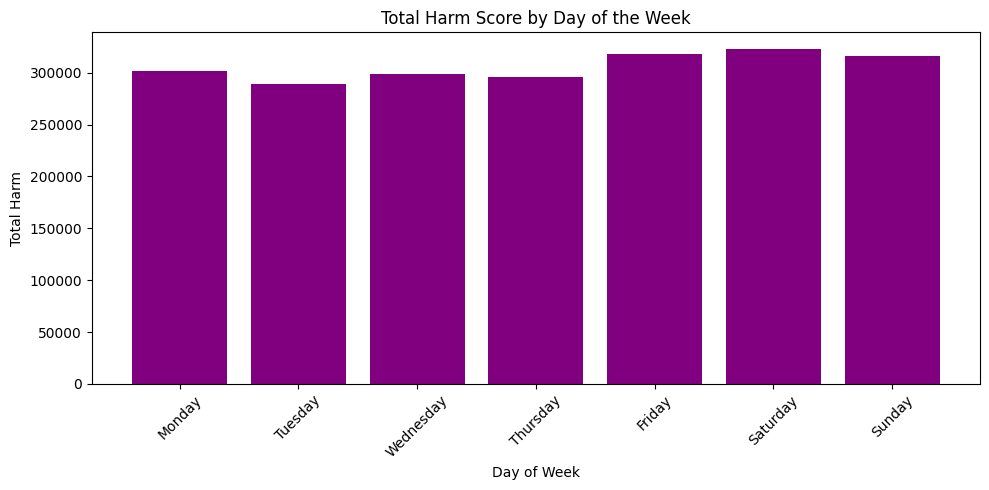

In [ ]:
#Grouping crimes by day of week, & calculating harm metrics
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow_harm = (df_new.groupby("DayOfWeek")["Crime_Severity_Score"].agg(total_harm="sum", avg_harm="mean", incidents="count").reindex(dow_order).reset_index())


#Plotting bar chart for total harm  by day of the week
plt.figure(figsize=(10,5))
plt.bar(dow_harm["DayOfWeek"], dow_harm["total_harm"], color="purple")
plt.title("Total Harm Score by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Harm")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()